<div class="alert alert-info">
<h2> Анализ оттока клиентов банка  <a class="tocSkip"></h2> 

<b>Цель:</b>  сегментировать клиентов банка для выявления портрета уходящих клиентов и их причины ухода.
    
<b>Задачи:</b>   
   1. Провести исследовательский анализ и ответить на следующие основные вопросы:
        - Какие основные особенности у уходящих клиентов?
        - Сколько клиентов остаются и какие у них особенности?
        - Какие заметны зависимости в данных?    
   2. Исследовать и проверить гипотезы; 
   3. Сделать выводы и дать рекомендации по полученным результатам;
    
<b>Содержание:</b>
   1. Предобработка данных   
   2. Анализ данных:
        - Расчет количества ушедших и оставшихся клиентов;
        - Портрет ушедших и оставшихся клиентов и их сравнение;
        - Выявление зависимости в данных через корреляционный анализ данных ушедших и оставшихся клиентов.
   3. Проверка гипотез:
        - Различия дохода между теми клиентами, которые ушли и теми, которые остались;
        - Различия кредитного скоринга на то какие клиенты остаются и какие уходят;
        - Различия количества продуктов, которыми пользуются клиенты, которые ушли и теми, которые остались;
        - Различия в активности клиентов, которые ушли и теми, которые остались.
   4. Общие выводы и рекомендации маркетинговому отделу банка; 
   5. Дополнительные материалы анализа оттока клиентов банка (презентация и дашборд) </div>

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
from plotly import graph_objects as go 
import plotly.express as px
from scipy import stats as st

In [2]:
data = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
bank_data = pd.read_csv(data)

bank_data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [3]:
#замена названия столбцов
bank_data = bank_data.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'})
bank_data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
#проверка пропусков
bank_data.isna().sum() 

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [5]:
#проверка пропусков в столбце balance
bank_data[bank_data['balance'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


In [6]:
#проверка типов данных
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [7]:
#подсчет явных дубликатов
bank_data.duplicated().sum()

0

In [8]:
#удаление явных дубликатов
bank_data = bank_data.drop_duplicates()
bank_data.duplicated().sum()

0

In [9]:
#проверка неявных дубликатов
bank_data_check = bank_data[bank_data.duplicated(subset=['user_id', 'gender', 'age', 'city','products', 'credit_card', 'churn'], keep=False)]
bank_data_check.sort_values('user_id',ascending=False)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


*Результат:* Был найден один явный дубликат. При поиске неявных дубликатов были проверены данные по пользовательскому идентификатору и другим основным данным как город, пол, возраст, количество продуктов, которыми пользуется клиент и наличие кредитной карты. Поскольку были найдены дубликаты, но у одного и того же клиента отличались баллы кредитного скоринга и баланс на счете, данные дубликаты не были удалены.

## Анализ данных

### Расчет количества ушедших и оставшихся клиентов

In [10]:
#посчитала количество ушедших и оставшихся клиентов
bank_data_numb = bank_data['churn'].value_counts().reset_index()
bank_data_numb.index = ['stayed', 'left']
bank_data_numb ['percent'] = round((bank_data_numb['churn']/bank_data_numb['churn'].sum()),3)*100
bank_data_numb.columns = ['churn', 'quantity', 'percent']
bank_data_numb

,churn,quantity,percent
stayed,0,8180,81.8
left,1,1820,18.2


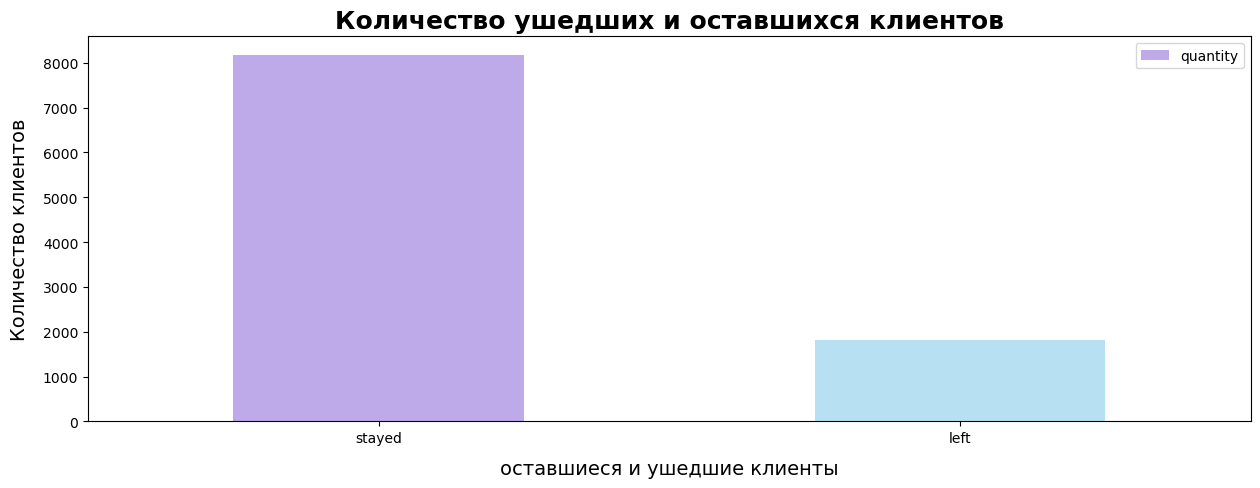

In [11]:
#график ушедших и оставшихся клиентов
list = ['mediumpurple','skyblue']
fig, ax = plt.subplots()
(bank_data_numb.plot(x='churn', y='quantity', kind='bar', figsize=(15,5), color = list, alpha =.6, ax=ax));
x = ['stayed','left']
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.title('Количество ушедших и оставшихся клиентов', fontsize=18, weight = 'bold')
plt.xlabel('оставшиеся и ушедшие клиенты', labelpad=10, weight='normal', size=14)
plt.ylabel('Количество клиентов', labelpad=10, weight='normal', size=14)
plt.xticks(rotation = 360)
plt.show()

In [12]:
#список ушешдших клиентов
bank_data.query('churn == 1').sort_values('user_id',ascending=False)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5764,229058,875.0,Ярославль,М,54.0,4,3680351.98,3,0,1,173790.63,1
8335,229017,817.0,Ярославль,М,49.0,5,2616800.01,4,0,1,187543.47,1
5044,229005,903.0,Ярославль,М,50.0,5,3607301.58,4,1,0,84957.59,1
8846,228987,869.0,Ярославль,М,53.0,4,3821282.25,3,0,1,102345.51,1
457,228963,887.0,Ярославль,М,62.0,5,3360245.32,4,1,1,127200.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,96679,853.0,Ярославль,Ж,29.0,0,223456.62,2,0,1,85216.97,1
9836,96562,896.0,Ростов,М,37.0,5,2037813.59,2,0,0,206019.80,1
5123,96404,841.0,Ростов,Ж,33.0,5,1287210.50,2,0,1,41812.27,1
8702,94590,869.0,Ростов,Ж,30.0,4,467040.46,1,1,1,156945.23,1


**Вывод:** Большая часть клиентов остались в банке (81,8%), что составляет 8177 клиентов. Количество ушедших клиентов составляет 1822, что является 18,22% от общего числа клиентов. 

### Портрет ушедших и оставшихся клиентов и их сравнение

In [13]:
#подсчет среднего значения в каждой категории датасета
bank_data_mean = round(bank_data.groupby('churn').agg('mean').T)
bank_data_mean.columns = ['stayed', 'left']
bank_data_mean

,stayed,left
user_id,172004.0,170962.0
score,845.0,863.0
age,43.0,41.0
equity,2.0,4.0
balance,733983.0,1133993.0
products,2.0,2.0
credit_card,1.0,1.0
last_activity,0.0,1.0
est_salary,147783.0,148243.0


**Вывод:** 
В среднем нет большой разницы у оставшихся и уходящих клиенток по баллам кредитного скоринга, по возрасту, количеству продуктов, наличии кредитной карточки и заработной плате. Однако большая разница в балансе на счету.
- Средний кредитный скоринг у уходящих клиентов 863, а оставшихся клиентов 845
- Средний возраст 42-43
- Средняя приблизительная оценка собственности у уходящего клиента 4, а у оставшихся - 2
- Средний баланс на счете у уходящего клиента 1133287, а у оставшихся - 734064
- У обоих клиентов в основном есть кредитная карта
- Уходящие клиенты в основном были активны последнее время
- В среднем оценочная заработная плата клиента примерно одинакова от 147764 до 148200.


In [14]:
#подсчет количества клиентов по баллам кредитного скоринга
bank_data_score = bank_data.pivot_table(index='score', values ='churn', aggfunc = 'count').reset_index()
bank_data_score = bank_data_score.sort_values('churn',ascending=False)
bank_data_score

,score,churn
247,900.0,80
236,889.0,75
241,894.0,70
246,899.0,70
255,908.0,68
...,...,...
342,995.0,1
31,684.0,1
345,998.0,1
51,704.0,1


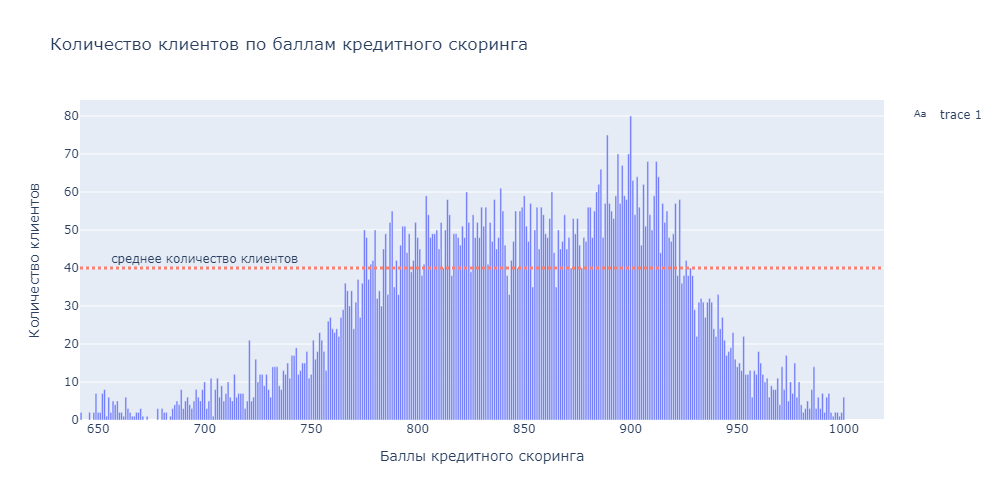

In [15]:
#график количества клиентов по баллам кредитного скоринга
data = px.data.election()
fig = px.bar(bank_data_score, x='score', y='churn', title='Количество клиентов по баллам кредитного скоринга')
fig.update_layout(xaxis_title='Баллы кредитного скоринга',
                   yaxis_title='Количество клиентов', 
                   width = 1000, height = 500                
)
#fig.update_xaxes(tickangle=90)

#добавлена линия среднего количества клиентов от максимального количества
fig.add_shape(
    type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=40, y1=40, yref="y"
)
# название линии
fig.add_trace(go.Scatter(
    x=[700, 1000],
    y=[42, 80],
    text=["среднее количество клиентов"],
    mode="text",
))
fig.show('png') 

In [16]:
#максимальные и минимильные баллы кредитного скоринга
score_min = bank_data['score'].min() 
score_max = bank_data['score'].max()
print('Минимальные баллы кредитного скоринга:', score_min)
print('Максимальные баллы кредитного скоринга:', score_max)

Минимальные баллы кредитного скоринга: 642.0
Максимальные баллы кредитного скоринга: 1000.0


**Вывод:** 
- Основное количество ушедших и оставшихся клиентов имеют кредитный скоринг в пределах 889 до 900 баллов, где от общего числа клиентов минимальный балл начинается с 642 и максимальный с 1000. 
- Большинство клиентов имеют 900 баллов кредитного скоринга

In [17]:
#топ-10 баллов по количеству кредитного скоринга по категориям
top10_credit = bank_data_score.head(10)
top10_credit_categ = (bank_data.query('score in @top10_credit.score').\
                     pivot_table(index='score', values='age', columns='churn', aggfunc='count',margins=True)\
                     .sort_values(by='All', ascending=False)
                    )
top10_credit_categ.columns = ['left', 'stayed', 'All']
top10_credit_categ

,left,stayed,All
score,,,
All,546,143,689
900.0,66,14,80
889.0,54,21,75
899.0,58,12,70
894.0,54,15,69
912.0,57,11,68
896.0,46,21,67
908.0,51,16,67
886.0,53,13,66


In [18]:
#сводная таблица кредитного скоринга с категориям клиентов
bank_data_credit_churn = bank_data.pivot_table(
    index='score', 
    columns='churn', 
    values='user_id',
    aggfunc='count').reset_index()
bank_data_credit_churn['total'] = bank_data_credit_churn[0] + bank_data_credit_churn[1]
bank_data_credit_churn ['% stayed'] = round((bank_data_credit_churn[0]/bank_data_credit_churn['total']),3)*100
bank_data_credit_churn ['% left'] = round((bank_data_credit_churn[1]/bank_data_credit_churn['total']),3)*100
bank_data_credit_churn.columns = ['score', 'left', 'stayed', 'total', '% stayed', '% left']
bank_data_credit_churn.sort_values(by='% left', ascending=False).head(30)

,score,left,stayed,total,% stayed,% left
334,987.0,1.0,2.0,3.0,33.3,66.7
346,999.0,1.0,1.0,2.0,50.0,50.0
213,866.0,26.0,24.0,50.0,52.0,48.0
215,868.0,26.0,21.0,47.0,55.3,44.7
340,993.0,4.0,3.0,7.0,57.1,42.9
224,877.0,23.0,17.0,40.0,57.5,42.5
217,870.0,27.0,18.0,45.0,60.0,40.0
209,862.0,33.0,20.0,53.0,62.3,37.7
216,869.0,35.0,19.0,54.0,64.8,35.2
200,853.0,37.0,20.0,57.0,64.9,35.1


In [19]:
#среднии значения по баллам их кредитного скоринга
bank_data.groupby('score').agg('mean').sort_values(by='churn', ascending=False).head(10).T

score,987.0,999.0,866.0,868.0,993.0,877.0,870.0,862.0,869.0,853.0
user_id,1.711667e+05,178367.50,174273.860000,165738.276596,1.551429e+05,169218.30000,167780.066667,169338.150943,163330.870370,164000.298246
age,5.066667e+01,48.00,43.600000,42.978723,4.185714e+01,43.77500,40.666667,42.396226,40.555556,42.228070
equity,3.333333e+00,2.00,3.560000,4.042553,4.142857e+00,3.47500,3.822222,3.754717,3.462963,3.508772
balance,2.481913e+06,5415034.13,790269.690816,921145.944565,1.258766e+06,721897.04800,711832.830909,766702.107547,748645.822453,642314.091930
products,2.000000e+00,1.50,2.200000,2.297872,2.000000e+00,1.92500,2.177778,2.264151,2.074074,2.105263
credit_card,3.333333e-01,0.00,0.560000,0.553191,7.142857e-01,0.52500,0.577778,0.603774,0.611111,0.543860
last_activity,0.000000e+00,0.50,0.560000,0.531915,7.142857e-01,0.62500,0.577778,0.509434,0.407407,0.561404
est_salary,1.713266e+05,545407.83,136157.125600,128820.474681,1.609784e+05,133028.96925,121279.784889,128446.877736,125559.104444,107674.700877
churn,6.666667e-01,0.50,0.480000,0.446809,4.285714e-01,0.42500,0.400000,0.377358,0.351852,0.350877


**Выводы:** Посмотрела процент ушедших и оставшихся клиентов от количества по каждому баллу кредитного скоринга. Потом отфильтровала их по проценту ушедших клиентов. Определенного влияния баллов на уход не замечено, особенно учитывая количество и соотношение клиентов в этих категориях. Также проверила влияние при выявлении средних значений данных по баллам их кредитного скоринга, которое тоже не было выявлено.

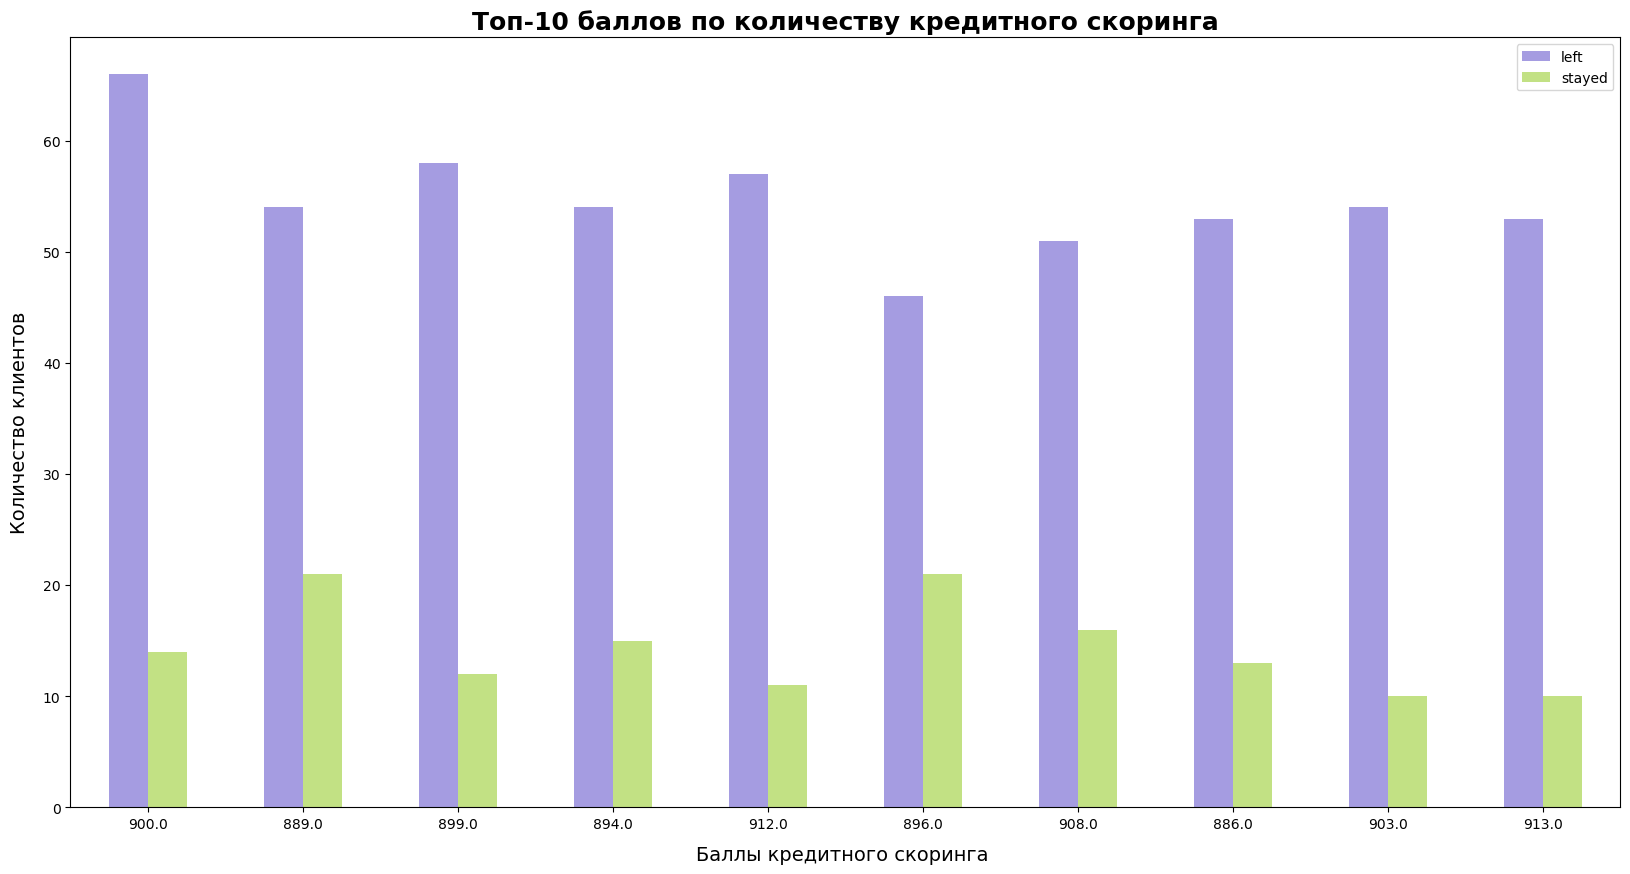

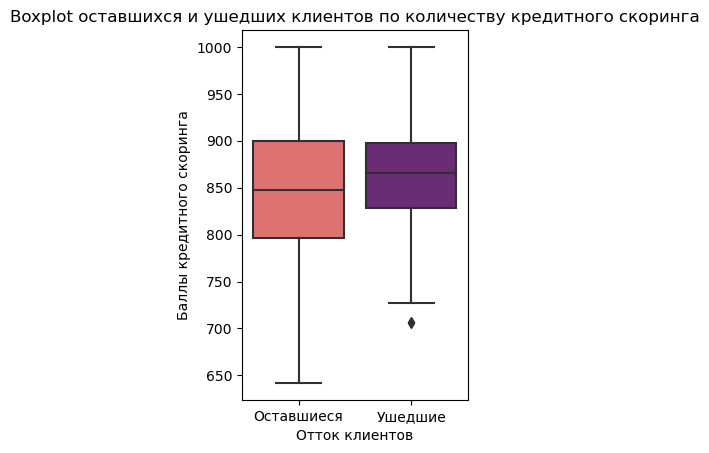

In [20]:
#график топ-10 баллов по скоринга по категориям
list = ['slateblue','yellowgreen']
fig, ax = plt.subplots()
(top10_credit_categ.drop('All', axis=1).drop('All').plot(kind='bar', figsize=(20,10), color = list, alpha =.6, ax=ax));

plt.title('Топ-10 баллов по количеству кредитного скоринга', fontsize=18, weight = 'bold')
plt.xlabel('Баллы кредитного скоринга ', labelpad=10, weight='normal', size=14)
plt.ylabel('Количество клиентов', labelpad=10, weight='normal', size=14)
plt.xticks(rotation = 360)
plt.show()
# boxplot оставшихся и ушедших клиентов по количеству кредитного скоринга    
sns.boxplot(y = 'score', x = 'churn', data = bank_data, ax = plt.subplot(1, 2, 2), palette='magma_r') 
plt.title('Boxplot оставшихся и ушедших клиентов по количеству кредитного скоринга')
plt.xlabel('Отток клиентов')
plt.ylabel('Баллы кредитного скоринга')
plt.xticks(np.arange(2), ('Оставшиеся', 'Ушедшие'))
plt.show();

**Вывод:** При распределении количества кредитного скоринга по категории среди топ-10 ушедших и оставшихся клиентов видно, что большинство клиентов являются оставшимися. 
- Самый высокий скоринг у  оставшихся достигает 900. 
- Среди ушедших самый высоки кредитный скоринг порядка 889 и 896. 

In [21]:
#количество клиентов по возрасту
bank_data_age = bank_data.pivot_table(index='age', values ='churn', aggfunc = 'count').reset_index()
bank_data_age ['percent'] = round((bank_data_age['churn']/bank_data_age['churn'].sum()),3)*100
bank_data_age = bank_data_age.sort_values('churn',ascending=False)
bank_data_age

,age,churn,percent
18,36.0,414,4.2
19,37.0,402,4.0
15,33.0,392,3.9
17,35.0,388,3.9
16,34.0,384,3.9
...,...,...,...
65,83.0,3,0.0
61,79.0,2,0.0
64,82.0,2,0.0
66,84.0,2,0.0


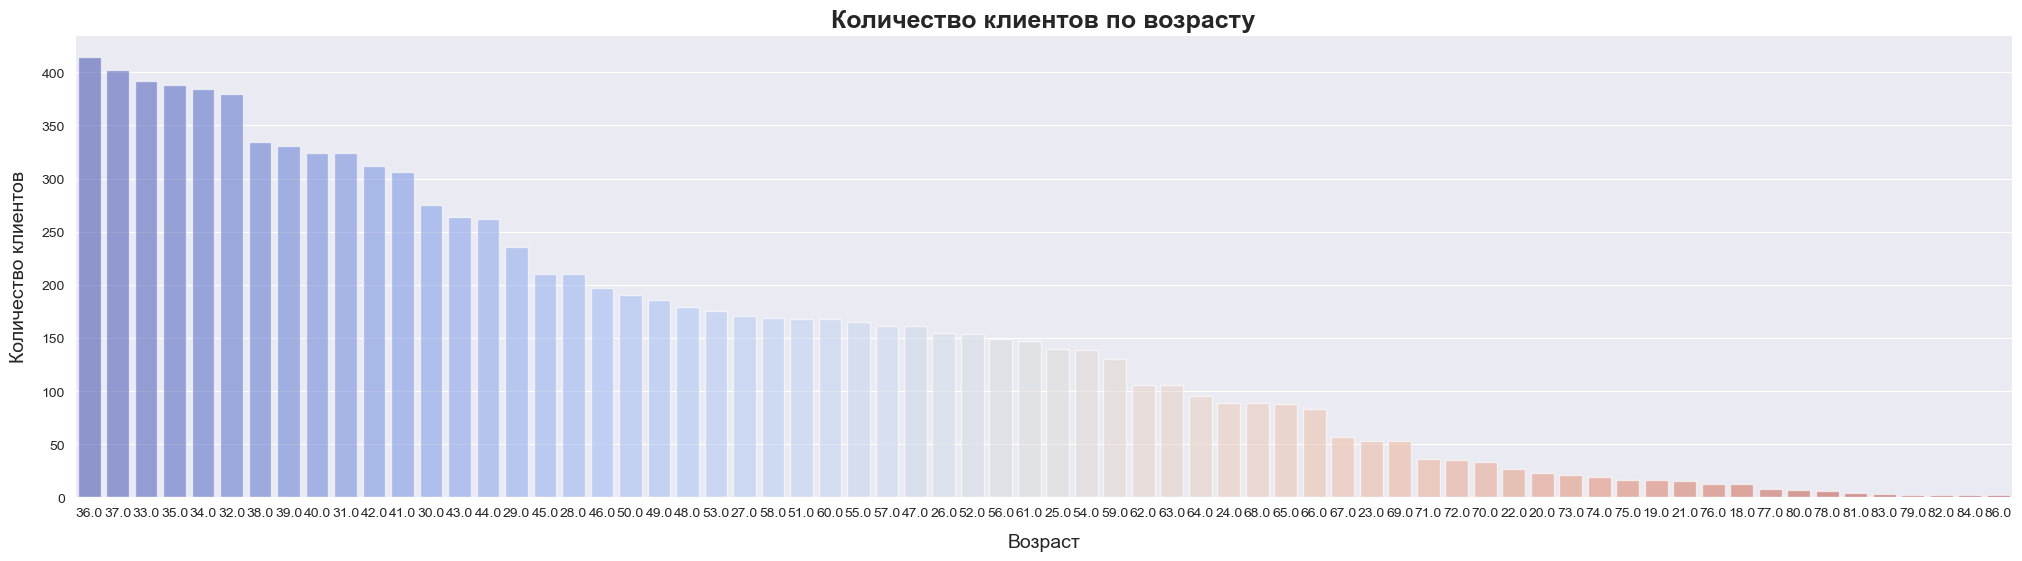

In [22]:
#график количества клиентов по возрасту
sns.set_style('darkgrid')
plt.figure(figsize=(25, 6))
sns.barplot(x='age', y='churn', data=bank_data_age, order=bank_data_age['age'], palette='coolwarm', alpha=.6)
plt.title('Количество клиентов по возрасту', fontsize=18, weight = 'bold')
plt.xlabel('Возраст', labelpad=10, weight='normal', size=14)
plt.ylabel('Количество клиентов', labelpad=10, weight='normal', size=14)
plt.show()

In [23]:
#топ-10 возрастов клиентов
top10_age_categ = (bank_data.query('age in @bank_data_age.age').\
                     pivot_table(index='age', values='user_id', columns='churn', aggfunc='count',margins=True)\
                     .sort_values(by='All', ascending=False).head(10)
                    )
top10_age_categ.columns = ['stayed', 'left', 'All']
top10_age_categ

,stayed,left,All
age,,,
All,8155.0,1819.0,9974
36.0,354.0,60.0,414
37.0,327.0,75.0,402
33.0,320.0,72.0,392
35.0,314.0,74.0,388
34.0,293.0,91.0,384
32.0,304.0,76.0,380
38.0,273.0,61.0,334
39.0,277.0,54.0,331


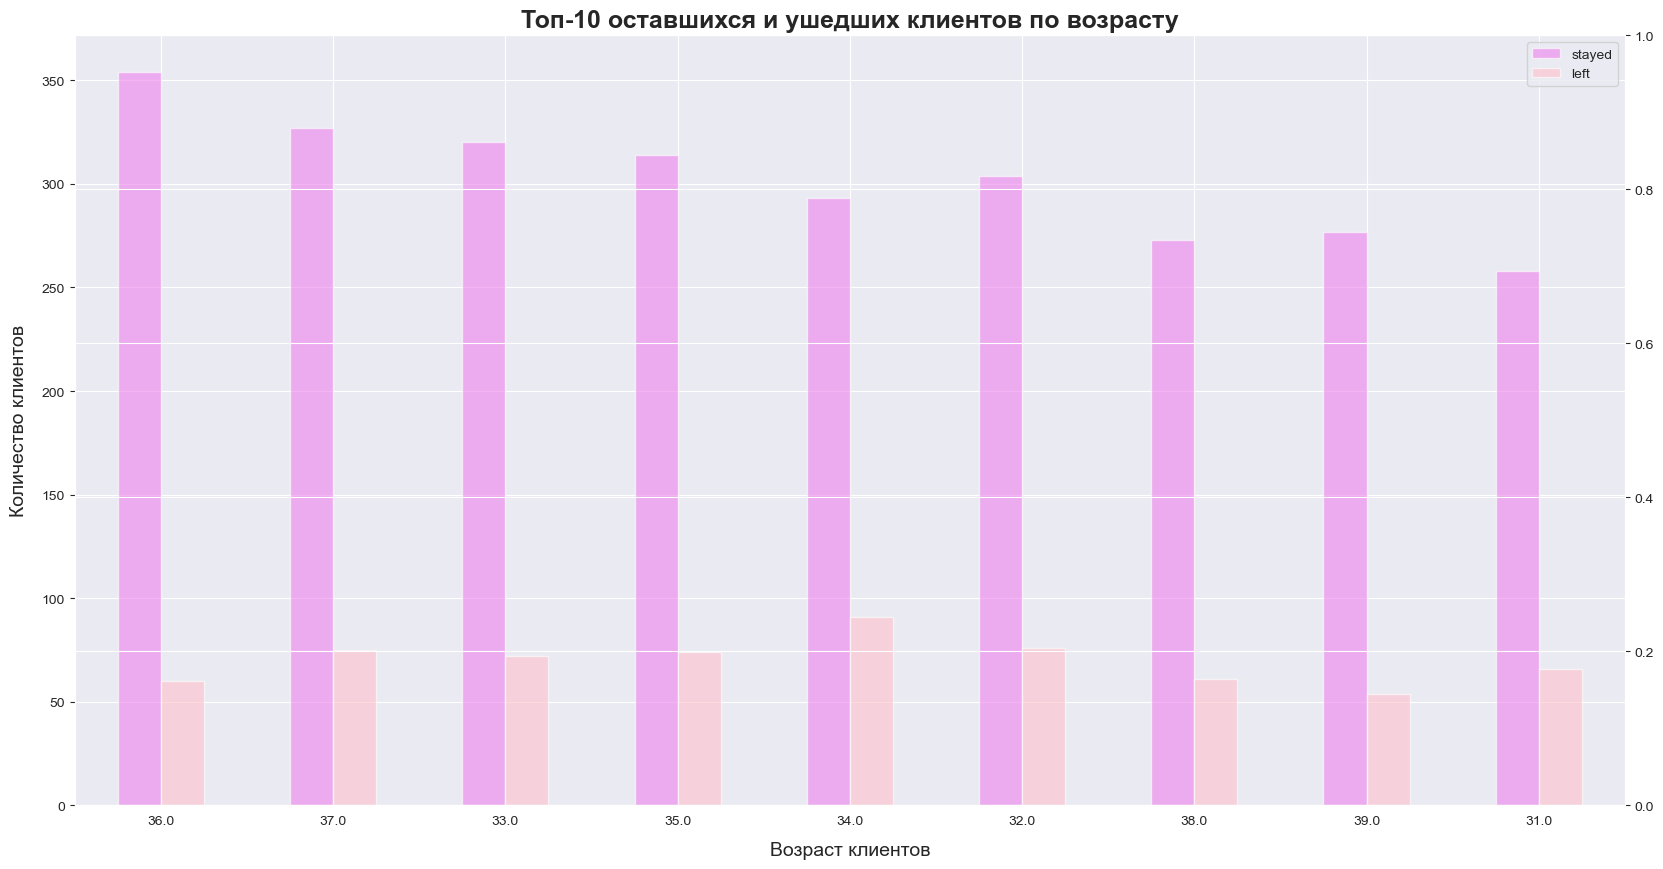

In [24]:
#Топ-10 оставшихся и ушедших клиентов по возрасту
list = ['violet','pink']
fig, ax = plt.subplots()
(top10_age_categ.drop('All', axis=1).drop('All').plot(kind='bar', figsize=(20,10), color = list, alpha =.6, ax=ax));
plt.title('Топ-10 оставшихся и ушедших клиентов по возрасту', fontsize=18, weight = 'bold')
plt.xlabel('Возраст клиентов', labelpad=10, weight='normal', size=14)
plt.ylabel('Количество клиентов', labelpad=10, weight='normal', size=14)
plt.xticks(rotation = 360)
ax2=ax.twinx()


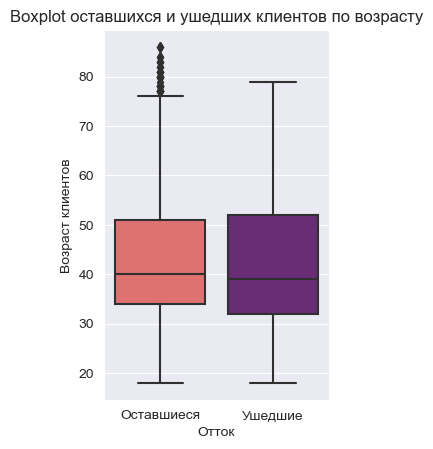

In [25]:
# boxplot оставшихся и ушедших клиентов по возрасту  
sns.boxplot(y = 'age', x = 'churn', data = bank_data, ax = plt.subplot(1, 2, 2), palette='magma_r') 
plt.title('Boxplot оставшихся и ушедших клиентов по возрасту')
plt.xlabel('Отток')
plt.ylabel('Возраст клиентов')
plt.xticks(np.arange(2), ('Оставшиеся', 'Ушедшие'))
plt.show();

**Вывод:** В распределении количества клиентов по возрасту были выявлены топ-10 возрастов клиентов. 
- Возраст ранжируется от 32 до 40 лет, где больше всего представлено клиентов в возрасте 36 лет. 
- При распределении количества клиентов по возрасту по категории среди топ-10 ушедших и оставшихся клиентов. На графике видно, что большинство клиентов являются оставшимися
- Ушедшие клиенты в основном в возраст 34, а оставшиеся в - 36. 

In [26]:
#сводная таблица количества клиентов по городам
bank_data_city_categ = bank_data.pivot_table(
    index='city', 
    columns='churn', 
    values='user_id',
    aggfunc='nunique').reset_index()
bank_data_city_categ['total'] = bank_data_city_categ[0] + bank_data_city_categ[1]
bank_data_city_categ ['percent'] = round((bank_data_city_categ['total']/bank_data_city_categ['total'].sum()),3)*100
bank_data_city_categ.columns = ['city', 'stayed', 'left', 'total', 'percent']
bank_data_city_categ

,city,stayed,left,total,percent
0,Ростов,1151,266,1417,14.2
1,Рыбинск,2258,437,2695,27.0
2,Ярославль,4771,1117,5888,58.9


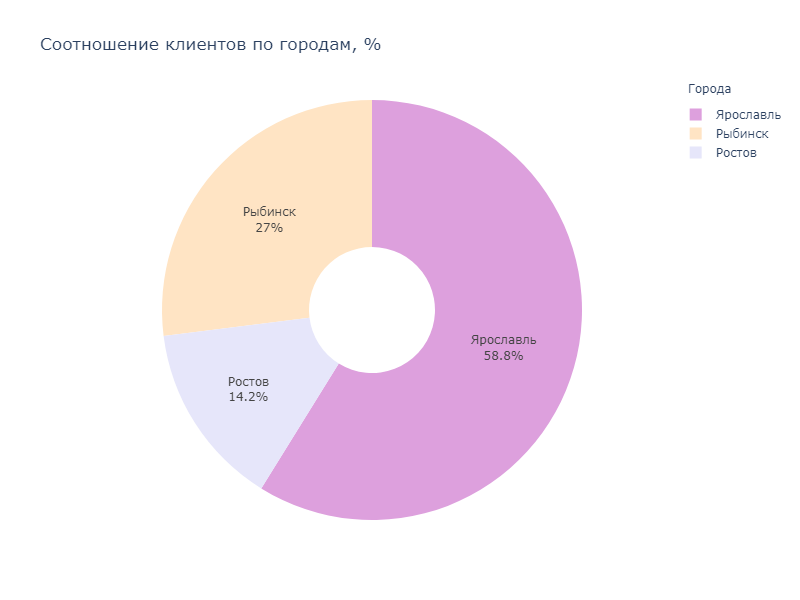

In [27]:
#построила pie chart клиентов по городам
fig = go.Figure(data=[go.Pie(labels=bank_data_city_categ['city'], 
                             values=bank_data_city_categ['percent'],
                             hole=.3,                        
                             textinfo='label+percent'
                             )]) 
fig.update_layout(title='Соотношение клиентов по городам, %', 
                  width=800, 
                  height=600,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Города',
                                    showarrow=False)])
fig.update_traces(marker=dict(colors=['lavender', 'bisque', 'plum']))
fig.show('png')

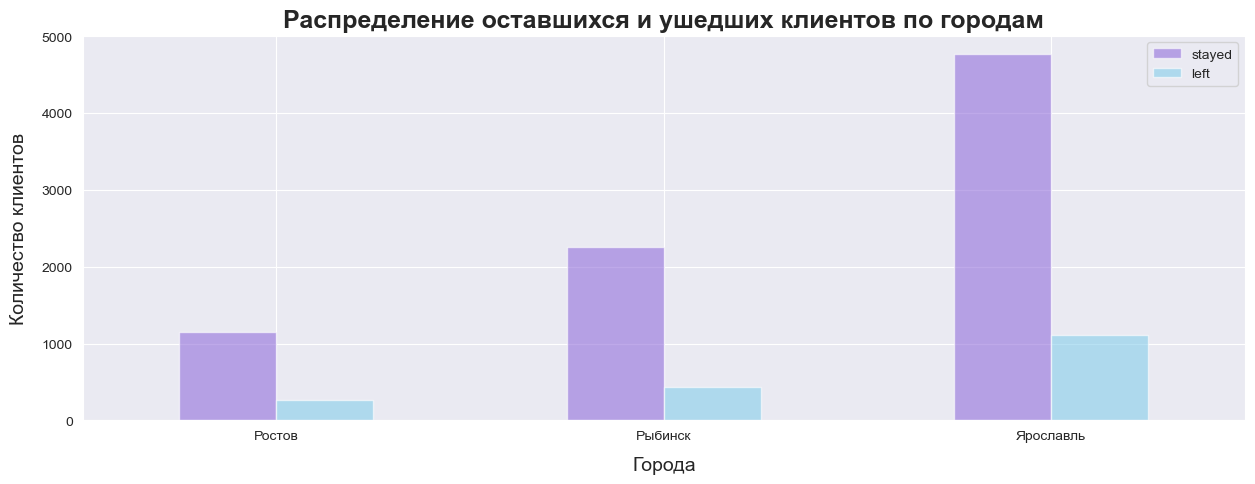

In [28]:
#график топ-10 клиентов по городам
list = ['mediumpurple','skyblue']
fig, ax = plt.subplots()
(bank_data_city_categ.drop(columns=['total', 'percent']).plot(x='city', kind='bar', figsize=(15,5), color = list, alpha =.6, ax=ax));
plt.title('Распределение оставшихся и ушедших клиентов по городам', fontsize=18, weight = 'bold')
plt.xlabel('Города', labelpad=10, weight='normal', size=14)
plt.ylabel('Количество клиентов', labelpad=10, weight='normal', size=14)

plt.xticks(rotation = 360)
plt.show()

**Вывод:** 
- В соотношении клиентов по городам заметно, что больше всего клиентов с Ярославля, что занимает более пятидесяти процентов от общего числа (59%) и составляет 4771 человек. Меньше всего в Ростове где общее количество составило 1161, то есть 14,3%
- При распределении количества клиентов по городам на оставшихся и ушедших, Ярославль имеет самое большое количество и оставшихся (4771) и ушедших (1121) клиентов.

In [29]:
#подсчет количества ушедших и оставшихся клиентов по полу
bank_data_gen = bank_data.pivot_table(
    index='gender', 
    columns='churn', 
    values='user_id',
    aggfunc='nunique').reset_index()
bank_data_gen['total'] = bank_data_gen[0] + bank_data_gen[1]
bank_data_gen ['percent'] = round((bank_data_gen['total']/bank_data_gen['total'].sum()),3)*100
bank_data_gen.columns = ['gender', 'stayed', 'left', 'total', 'percent']
bank_data_gen

,gender,stayed,left,total,percent
0,Ж,4348,637,4985,50.0
1,М,3809,1183,4992,50.0


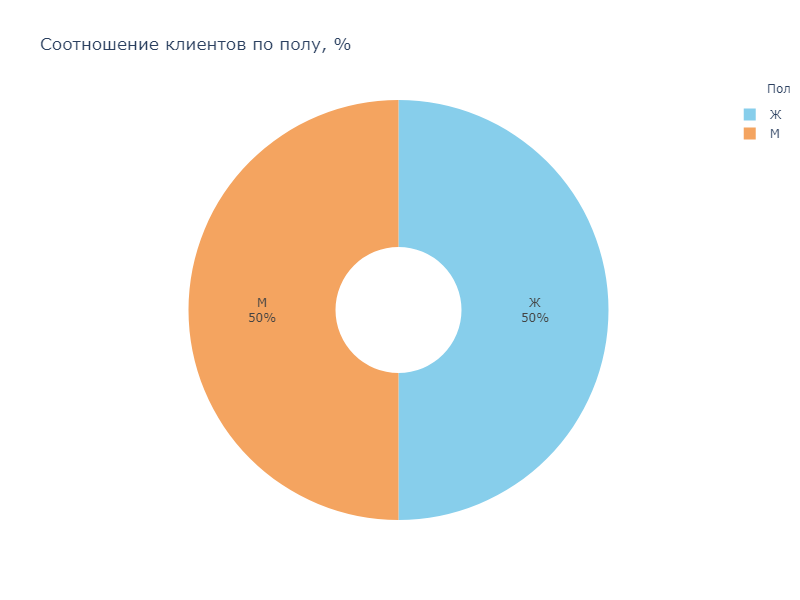

In [30]:
#pie chart клиентов по полу
fig = go.Figure(data=[go.Pie(labels=bank_data_gen['gender'], 
                             values=bank_data_gen['percent'],
                             hole=.3,                        
                             textinfo='label+percent'
                             )]) 
fig.update_layout(title='Соотношение клиентов по полу, %', 
                  width=800, 
                  height=600,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Пол',
                                    showarrow=False)])
fig.update_traces(marker=dict(colors=['skyblue', 'sandybrown']))
fig.show('png')

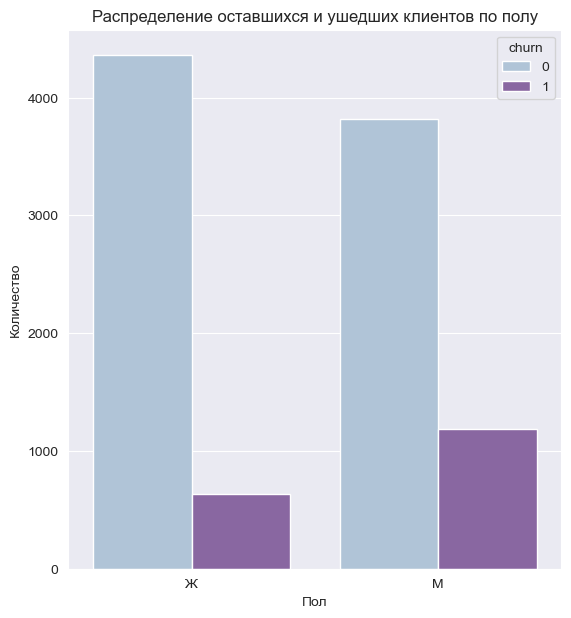

In [31]:
#Распределение клиентов по полу
plt.figure(figsize=(14,7))
sns.countplot(x = 'gender', hue = 'churn', data = bank_data, ax = plt.subplot(1, 2, 1),  palette='BuPu')
plt.title('Распределение оставшихся и ушедших клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество');

**Вывод:** 
- Соотношение мужчин и женщин практически одинаковое
- Чаще всего уходят клиенты мужского пола

In [32]:
#подсчет приблизительной оценки собственности ушедших клиентов
bank_data_eq = bank_data.pivot_table(index='equity', values ='churn', aggfunc = 'count').reset_index()
bank_data_eq ['percent'] = round((bank_data_eq['churn']/bank_data_eq['churn'].sum()),3)*100
bank_data_eq = bank_data_eq.sort_values('churn',ascending=False)
bank_data_eq

,equity,churn,percent
0,0,2592,25.9
5,5,1918,19.2
4,4,1850,18.5
3,3,1543,15.4
2,2,1052,10.5
1,1,774,7.7
6,6,161,1.6
7,7,80,0.8
8,8,17,0.2
9,9,13,0.1


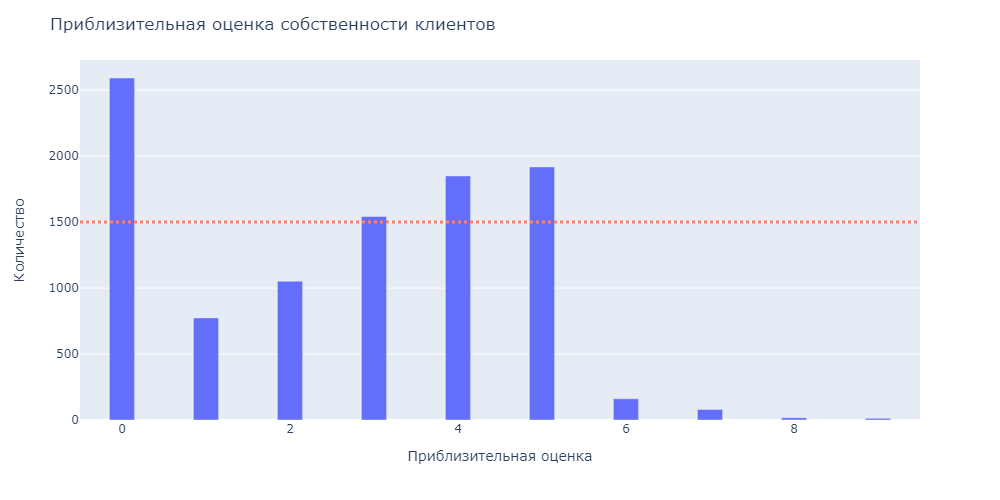

In [33]:
#график приблизительной оценки собственности клиентов
data = px.data.election()
fig = px.bar(bank_data_eq.sort_values(by='churn', ascending=False), x='equity', y='churn')
fig.update_layout(title='Приблизительная оценка собственности клиентов',
                   xaxis_title='Приблизительная оценка',
                   yaxis_title='Количество',
                   width = 1000, height = 500
                
)
fig.update_traces(width=0.3)
fig.add_shape(
    type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=1500, y1=1500, yref="y"
)
fig.show('png') 

In [34]:
#подсчет приблизительной оценки собственности клиентов
bank_data_eq_categ = bank_data.pivot_table(
    index='equity', 
    columns='churn', 
    values='user_id',
    aggfunc='nunique').reset_index()
bank_data_eq_categ['total'] = bank_data_eq_categ[0] + bank_data_eq_categ[1]
bank_data_eq_categ ['percent'] = round((bank_data_eq_categ['total']/bank_data_eq_categ['total'].sum()),3)*100
bank_data_eq_categ.columns = ['equity', 'stayed', 'left', 'total', 'percent']
bank_data_eq_categ

,equity,stayed,left,total,percent
0,0,2488,90,2578,25.8
1,1,681,93,774,7.8
2,2,885,166,1051,10.5
3,3,1221,322,1543,15.5
4,4,1384,464,1848,18.5
5,5,1339,577,1916,19.2
6,6,103,58,161,1.6
7,7,43,37,80,0.8
8,8,11,6,17,0.2
9,9,6,7,13,0.1


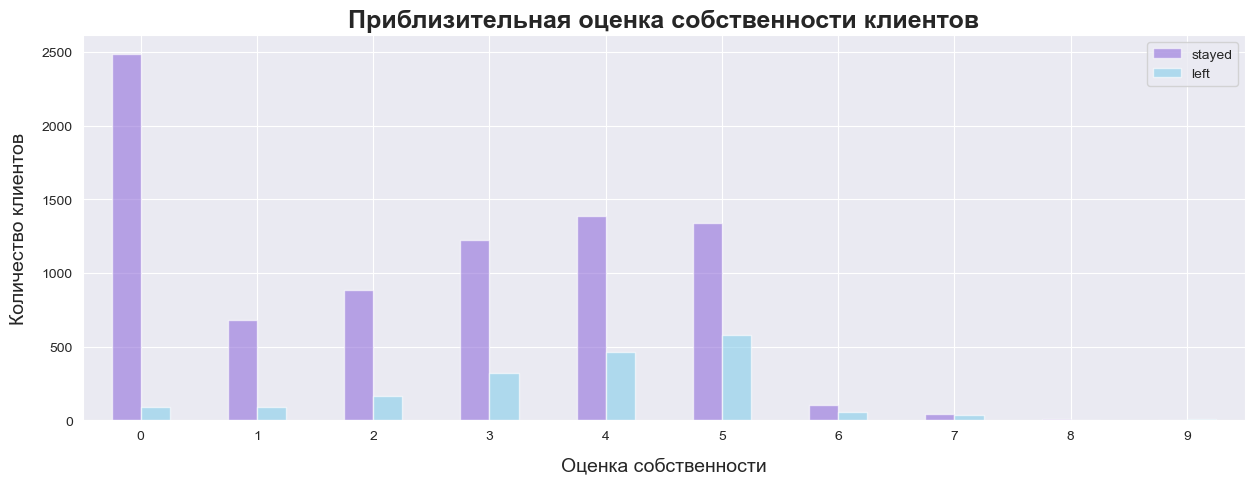

In [35]:
#график приблизительной оценки собственности клиентов
list = ['mediumpurple','skyblue']
fig, ax = plt.subplots()
(bank_data_eq_categ.drop(columns=['total', 'percent']).plot(x='equity', kind='bar', figsize=(15,5), color = list, alpha =.6, ax=ax));
plt.title('Приблизительная оценка собственности клиентов', fontsize=18, weight = 'bold')
plt.xlabel('Оценка собственности', labelpad=10, weight='normal', size=14)
plt.ylabel('Количество клиентов', labelpad=10, weight='normal', size=14)

plt.xticks(rotation = 360)
plt.show()

In [36]:
#сводная таблица приблизительной оценки собственности клиентов
bank_data_eq_categ_churn = bank_data.pivot_table(
    index='equity', 
    columns='churn', 
    values='user_id',
    aggfunc='count').reset_index()
bank_data_eq_categ_churn['total'] = bank_data_eq_categ_churn[0] + bank_data_eq_categ_churn[1]
bank_data_eq_categ_churn ['% оставшихся'] = round((bank_data_eq_categ_churn[0]/bank_data_eq_categ_churn['total']),3)*100
bank_data_eq_categ_churn ['% ушедших'] = round((bank_data_eq_categ_churn[1]/bank_data_eq_categ_churn['total']),3)*100
bank_data_eq_categ_churn.columns = ['equity', 'stayed', 'left', 'total', '% stayed', '% left' ]
bank_data_eq_categ_churn.sort_values(by='% left', ascending=False).head(30)

,equity,stayed,left,total,% stayed,% left
9,9,6,7,13,46.2,53.8
7,7,43,37,80,53.8,46.2
6,6,103,58,161,64.0,36.0
8,8,11,6,17,64.7,35.3
5,5,1341,577,1918,69.9,30.1
4,4,1386,464,1850,74.9,25.1
3,3,1221,322,1543,79.1,20.9
2,2,886,166,1052,84.2,15.8
1,1,681,93,774,88.0,12.0
0,0,2502,90,2592,96.5,3.5


**Вывод:** При более детальном посмотреле процента ушедших и оставшихся клиентов от количества по каждой оценке собственности клиента, процент ушедших больше всего среди тех, у кого оценка 9, 7 и 6

In [37]:
#подсчет количества клиентов, которые были активны в последннее время
bank_data_act = bank_data.pivot_table(
    index='last_activity', 
    columns='churn', 
    values='user_id',
    aggfunc='nunique').reset_index()
bank_data_act.index = ['не был активен в последнее время', 'был активен в последнее время']
bank_data_act['total'] = bank_data_act[0] + bank_data_act[1]
bank_data_act ['percent'] = round((bank_data_act['total']/bank_data_act['total'].sum()),3)*100
bank_data_act.columns = ['last_activity', 'stayed', 'left', 'total', 'percent' ]
bank_data_act

,last_activity,stayed,left,total,percent
не был активен в последнее время,0,4218,542,4760,47.7
был активен в последнее время,1,3941,1278,5219,52.3


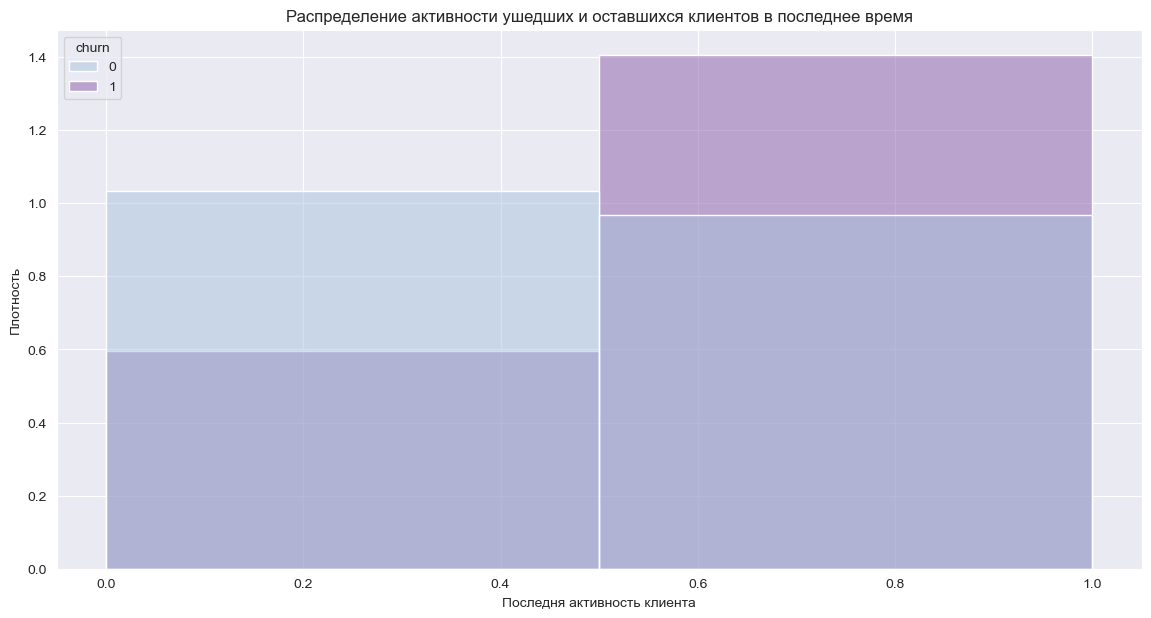

In [38]:
plt.figure(figsize=(14,7))
sns.histplot(data=bank_data,
             hue='churn',
             x='last_activity',
             stat='density',
             common_norm=False,
             bins= 2,
             palette='BuPu')
plt.title('Распределение активности ушедших и оставшихся клиентов в последнее время')
plt.xlabel('Последня активность клиента')
plt.ylabel('Плотность');

**Вывод:** В последнее время большинство ушедших клиентов проявляли активность.

In [39]:
#подсчет количества клиентов, которые имели кредитную карту
bank_data_cred = bank_data.pivot_table(
    index='credit_card', 
    columns='churn', 
    values='user_id',
    aggfunc='nunique').reset_index()
bank_data_cred.index = ['нет кредитной карты', 'есть кредитная карта']
bank_data_cred['total'] = bank_data_cred[0] + bank_data_cred[1]
bank_data_cred ['percent'] = round((bank_data_cred['total']/bank_data_cred['total'].sum()),3)*100
bank_data_cred.columns = ['credit_card', 'stayed', 'left', 'total', 'percent' ]
bank_data_cred

,credit_card,stayed,left,total,percent
нет кредитной карты,0,2377,817,3194,32.0
есть кредитная карта,1,5785,1003,6788,68.0


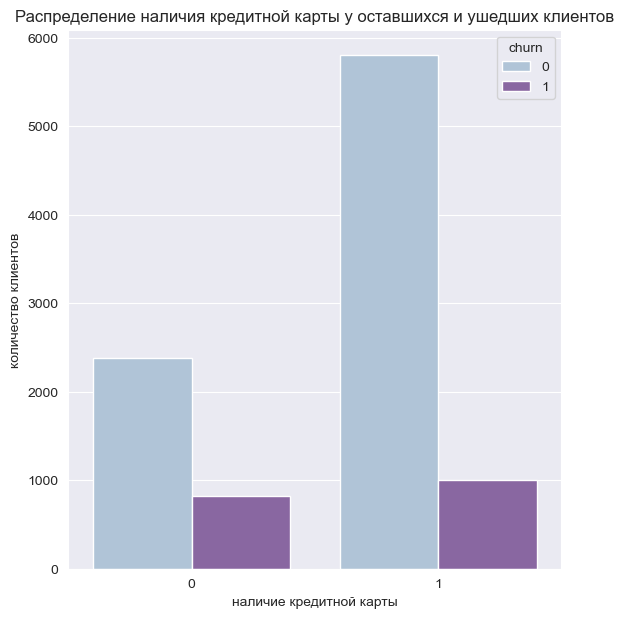

In [40]:
#график распределения наличия кредитной карты
plt.figure(figsize=(14,7))
sns.countplot(x = 'credit_card', hue = 'churn', data = bank_data, ax = plt.subplot(1, 2, 1),  palette='BuPu')
plt.title('Распределение наличия кредитной карты у оставшихся и ушедших клиентов')
plt.xlabel('наличие кредитной карты')
plt.ylabel('количество клиентов');

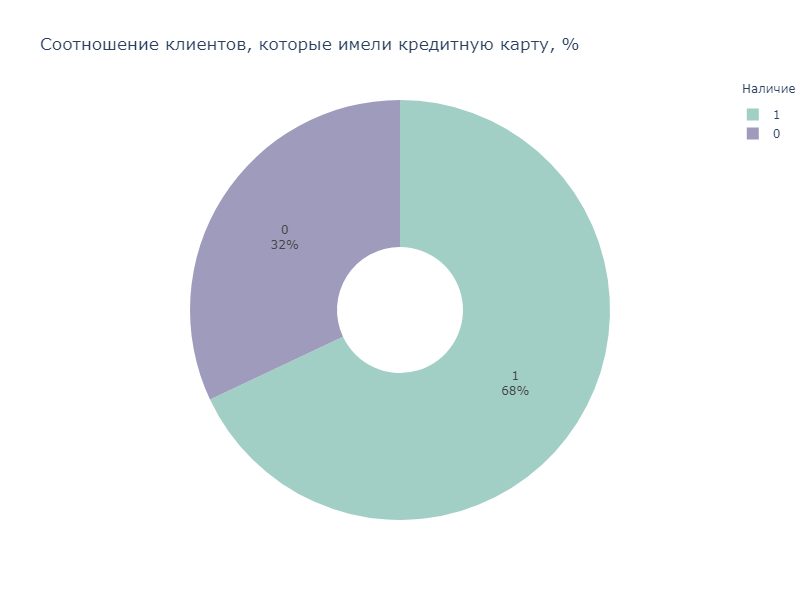

In [41]:
#pie chart соотношения клиентов, которые имели кредитную карту
fig = go.Figure(data=[go.Pie(labels=bank_data_cred['credit_card'], 
                             values=bank_data_cred['percent'],
                             hole=.3,                        
                             textinfo='label+percent'
                             )]) 
fig.update_layout(title='Соотношение клиентов, которые имели кредитную карту, %', 
                  width=800, 
                  height=600,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Наличие',
                                    showarrow=False)])
fig.update_traces(marker=dict(colors=['#9f9bbc', '#a1cec5']))
fig.show('png') 

**Вывод:** Большинство оставшихся клиентов имеют кредитную карту. Среди ушедших чуть больше половины клиентов имели кредитную карту, а другая часть нет.

In [42]:
#данные по столбцу баланс на счету
bank_data.balance.describe()

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

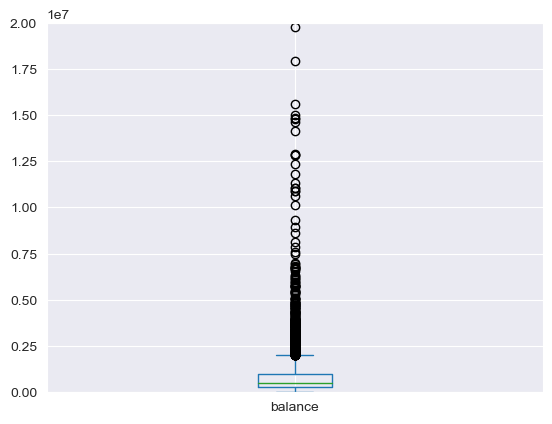

In [43]:
#проверка выборосов в данных о балансе на счету
bank_data.balance.plot.box()
plt.ylim(0, 20000000);

In [44]:
#чтобы убрать выбросы были подсчитаны квантили 0.25 и 0.75
q1= bank_data.balance.quantile(0.25)
q3= bank_data.balance.quantile(0.75)
iqr= q1-q3
#после сделала срез, убрав слишком высокий баланс, которым небольшое количество клинетов
bank_data_filtered = bank_data.query('balance <= @q3 + 0.5 * @q3')

<AxesSubplot:>

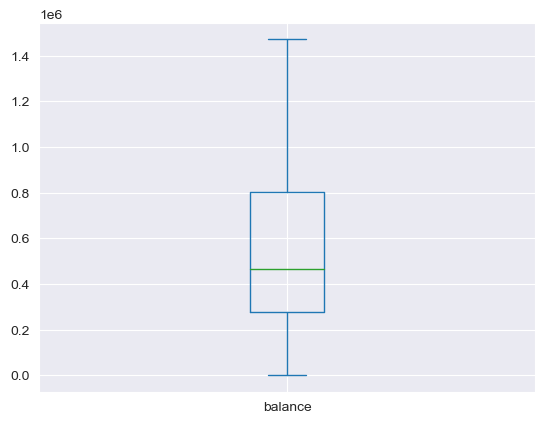

In [45]:
bank_data_filtered.balance.plot.box()

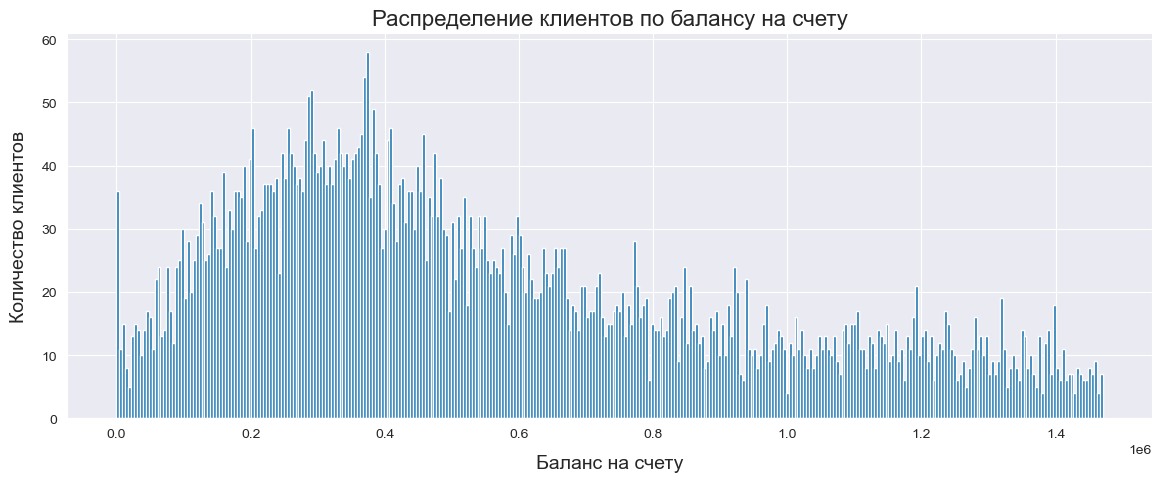

In [46]:
#график распределения клиентов по балансу на счету
bank_data_filtered['balance'].hist(bins=14*24, figsize=(14, 5)).set_title('Распределение клиентов по балансу на счету', fontsize=16)
plt.xlabel("Баланс на счету", labelpad=10, weight='normal', size=14)
plt.ylabel("Количество клиентов", labelpad=10, weight='normal', size=14)
plt.show();

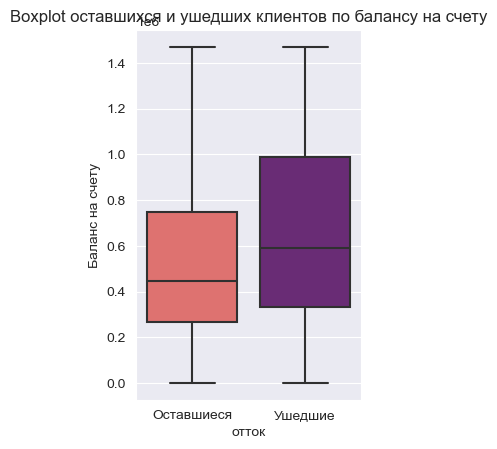

In [47]:
#boxplot оставшихся и ушедших клиентов по балансу на счету по отфильтрованным данным   
sns.boxplot(y = 'balance', x = 'churn', data = bank_data_filtered, ax = plt.subplot(1, 2, 2), palette='magma_r') 
plt.title('Boxplot оставшихся и ушедших клиентов по балансу на счету')
plt.xlabel('отток')
plt.ylabel('Баланс на счету')
plt.xticks(np.arange(2), ('Оставшиеся', 'Ушедшие'))
plt.show();

**Вывод**: Отфлитрованные данные по балансу клиентов показали, что больше ушедших клиентов, которые имели больше денег на счету.

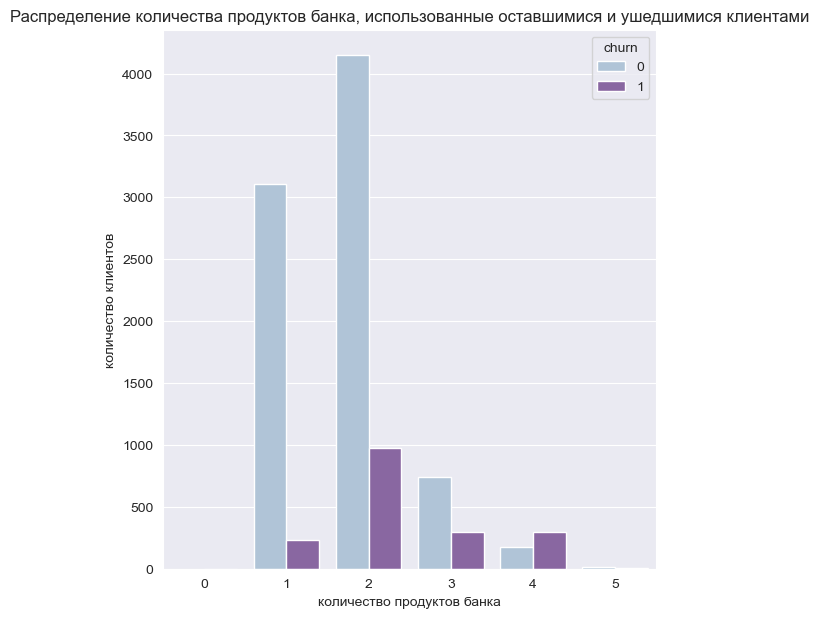

In [48]:
#график распределения количества продуктов банка, использованные оставшимися и ушедшимися клиентами
plt.figure(figsize=(14,7))
sns.countplot(x = 'products', hue = 'churn', data = bank_data, ax = plt.subplot(1, 2, 1),  palette='BuPu')
plt.title('Распределение количества продуктов банка, использованные оставшимися и ушедшимися клиентами')
plt.xlabel('количество продуктов банка')
plt.ylabel('количество клиентов');

**Вывод:** Больше всего продуктов у оставшихся клиентов. У них чаще всего по два продукта.

In [49]:
#данные по заработной плате
bank_data_filtered.est_salary.describe()

count    6.949000e+03
mean     1.103966e+05
std      6.771109e+04
min      2.546300e+03
25%      6.329327e+04
50%      1.001115e+05
75%      1.446513e+05
max      1.008648e+06
Name: est_salary, dtype: float64

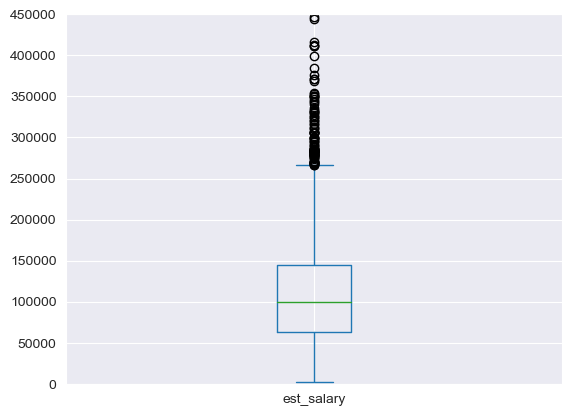

In [50]:
#проверка на выборсы в данных о заработной плате
bank_data_filtered.est_salary.plot.box()
plt.ylim(0, 450000);

In [51]:
#чтобы убрать выбросы были подсчитаны квантили 0.25 и 0.75
q1= bank_data.est_salary.quantile(0.25)
q3= bank_data.est_salary.quantile(0.75)
iqr= q1-q3
#после сделала срез, убрав слишком высокую зарплату, которую получают небольшое количество клиентов
bank_data_filtered = bank_data.query('est_salary <= @q3 + 0.3 * @q3')

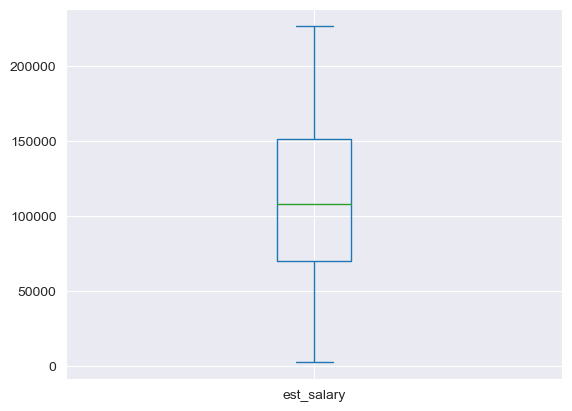

In [52]:
bank_data_filtered.est_salary.plot.box();

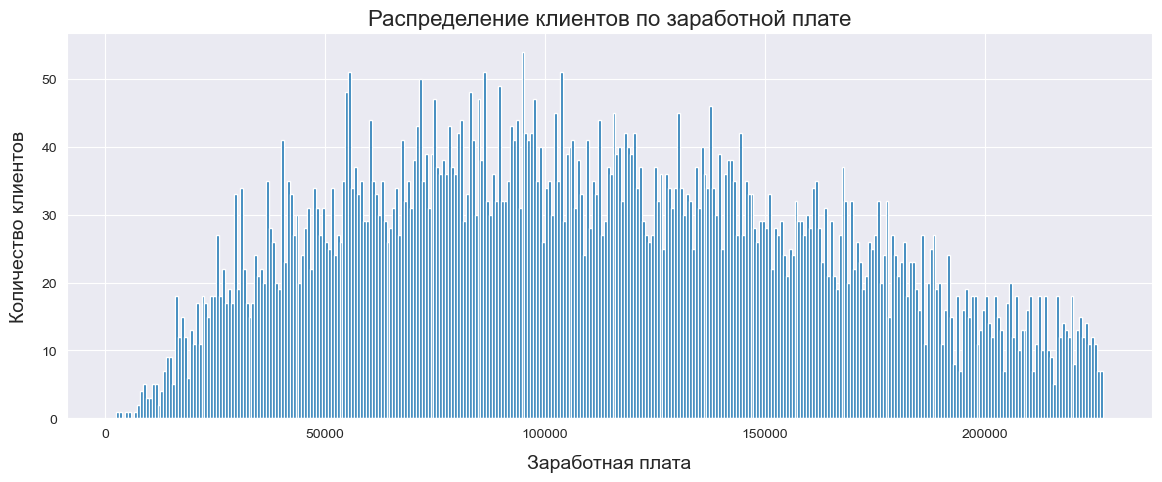

In [53]:
# график количества клиентов по заработной плате
bank_data_filtered['est_salary'].hist(bins=14*24, figsize=(14, 5)).set_title('Распределение клиентов по заработной плате', fontsize=16)
plt.xlabel("Заработная плата", labelpad=10, weight='normal', size=14)
plt.ylabel("Количество клиентов", labelpad=10, weight='normal', size=14)
plt.show();

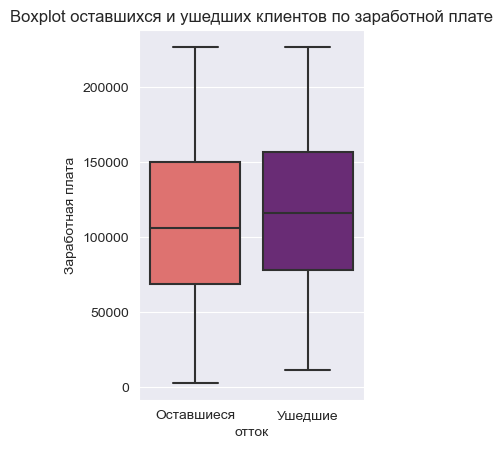

In [54]:
# boxplot оставшихся и ушедших клиентов по заработной плате по отфильтрованным данным   
sns.boxplot(y = 'est_salary', x = 'churn', data = bank_data_filtered, ax = plt.subplot(1, 2, 2), palette='magma_r') 
plt.title('Boxplot оставшихся и ушедших клиентов по заработной плате')
plt.xlabel('отток')
plt.ylabel('Заработная плата')
plt.xticks(np.arange(2), ('Оставшиеся', 'Ушедшие'))
plt.show();

**Вывод:** Отфильтрованные данные по заработной плате показали, что разница в распределении заработной платы по оставшимся и ушедшим клиентом небольшая.

### Выявление зависимости в данных через корреляционный анализ данных ушедших и оставшихся клиентов

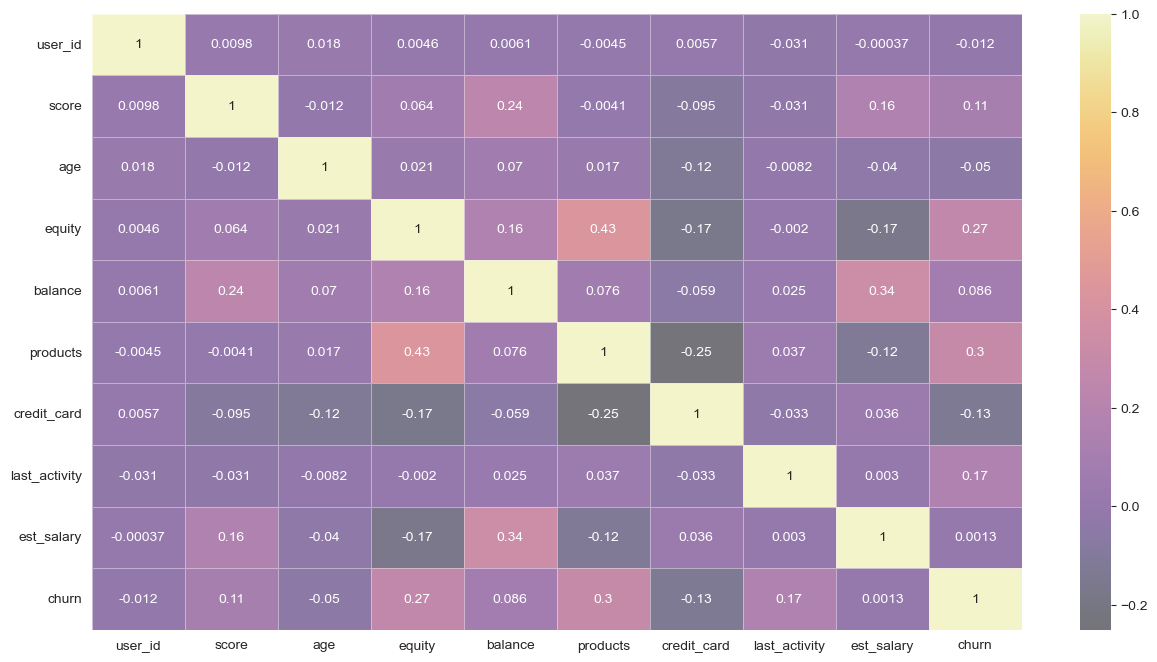

In [55]:
f, ax = plt.subplots(figsize=(15, 8))

sns.heatmap(bank_data.corr(), annot=True, linewidths=.5, ax=ax, cmap='inferno', alpha=.5)
plt.show()

**Выводы:** Анализ матрицы корреляции показал, что корреляция в основном не сильная и можно выделить следующие признаки влияния на отток клиентов:
- умеренная положительная корреляция у оценки собственности клиента с количество продуктов и его баланса
- умеренная положительная корреляция также у количества продуктов с уходом клиента
- баллы кредитного скоринга с заработной платой имеют слабую положительная корреляцию
- так же положительное влияние имеют баланс с оценкой собственности, кредитной карты, баллы кредитного скоринга и зарплаты
- слабые негативные корреляции заметны у наличия кредитной карты с количество продуктов, оценкой собственности и возраста

Таким образом, основным признаком оттока клиентов это его баланс на счете, оценка их собственности и количество продуктов банка, которыми они пользуются

## Выделение сегментов клиентов, склонные к уходу из банка

In [56]:
#среднии значения по балансу
bank_data.groupby('balance').agg('mean').tail(10).T

balance,1.562410e+07,1.790476e+07,1.975718e+07,2.090616e+07,2.154994e+07,2.572776e+07,2.900893e+07,4.327710e+07,6.486621e+07,1.191136e+08
user_id,163640.00,203824.00,227092.0,137434.0,221720.00,122015.0,228786.00,114088.0,114103.0,156149.00
score,912.00,986.00,1000.0,1000.0,1000.00,885.0,1000.00,927.0,894.0,900.00
age,35.00,34.00,32.0,37.0,35.00,64.0,45.00,57.0,58.0,62.00
equity,4.00,5.00,5.0,4.0,5.00,4.0,5.00,5.0,4.0,5.00
products,2.00,2.00,2.0,2.0,2.00,3.0,2.00,3.0,2.0,2.00
credit_card,0.00,1.00,1.0,1.0,0.00,1.0,0.00,0.0,1.0,1.00
last_activity,1.00,1.00,1.0,1.0,0.00,0.0,1.00,1.0,1.0,1.00
est_salary,1395064.45,856500.86,1024626.5,947606.6,1051902.65,168746.9,811804.54,82619.0,88861.6,138041.31
churn,0.00,1.00,0.0,1.0,0.00,0.0,0.00,0.0,1.0,0.00


**Выводы оттока по балансу:** 
- 100% отток среди клиентов с высоким балансом на счету, среднего возраста (34 года и 37 лет) с высоким кредитным скорингом, с оценкой собственности в 4 балла, которые использовали 2 продукта банка, с кредитной карточки и с высокой зарплатой.
- другой 100% оттока среди клиентов с высоким балансом на счету, пожилого возраста (58 лет) также достаточно с высоким кредитным скорингом, с оценкой собственности в 4 балла, тоже использовали 2 продукта банка, с кредитной карточки, но с низкой зарплатой.

In [57]:
#среднии значения по оценки их собственности
bank_data.groupby('equity').agg('mean').T

equity,0,1,2,3,4,5,6,7,8,9
user_id,171454.429784,173187.581395,172044.289924,170911.491251,171686.260541,1.721692e+05,174902.683230,175179.512500,1.685144e+05,161889.384615
score,857.180556,827.125323,823.664449,834.996111,851.212973,8.656230e+02,863.391304,867.237500,8.888824e+02,891.384615
age,42.131599,42.573092,42.976213,43.556132,42.610179,4.299530e+01,42.527950,41.625000,4.635294e+01,38.692308
balance,156473.349684,270551.148894,476551.922624,732974.190895,999078.870800,1.258990e+06,864982.449379,899941.534750,1.135016e+06,765708.797692
products,1.269676,1.803618,1.995247,2.037589,2.133514,2.185089e+00,2.347826,2.325000,2.235294e+00,2.384615
credit_card,0.796296,0.741602,0.690114,0.640311,0.629730,5.881126e-01,0.596273,0.600000,3.529412e-01,0.692308
last_activity,0.545139,0.515504,0.470532,0.509397,0.524324,5.281543e-01,0.571429,0.625000,6.470588e-01,0.461538
est_salary,208248.104591,123318.264858,112005.987006,118080.994323,127864.005714,1.421865e+05,131518.520994,116002.004125,1.274700e+05,117564.523846
churn,0.034722,0.120155,0.157795,0.208684,0.250811,3.008342e-01,0.360248,0.462500,3.529412e-01,0.538462


**Выводы оттока по оценки их собственности:** 
- 100% отток среди клиентов нет
- 53% оттока среди клиентов среднего возраста (38 лет) с высоким кредитным скорингом, с оценкой собственности в 9 баллов, которые использовали 2 продукта банка. Большинство клиентов данного сегмента имели кредитную карточку и со средней зарплатой.
- 46% оттока среди клиентов чуть старше среднего возраста (41 год) также достаточно с высоким кредитным скорингом, с оценкой собственности в 7 баллов, тоже использовали 2 продукта банка. Также большинство клиентов имели кредитную карточку и были со средней зарплатой.

In [58]:
#среднии значения по продуктам
bank_data.groupby('products').agg('mean').T

products,0,1,2,3,4,5
user_id,147837.00,172136.050584,171491.988685,172988.642926,1.708699e+05,163015.578947
score,962.00,854.298114,844.563792,837.307988,8.782679e+02,859.263158
age,79.00,42.196208,42.768900,45.714836,3.978270e+01,36.473684
equity,3.00,1.324753,3.151190,3.518768,4.151899e+00,3.684211
balance,NaN,610823.762221,813134.472544,994013.497634,1.267821e+06,610986.633684
credit_card,0.00,0.863813,0.625439,0.356112,6.814346e-01,1.000000
last_activity,0.00,0.528285,0.516192,0.416747,7.890295e-01,0.894737
est_salary,25063.96,180731.037920,130395.346490,128654.951925,1.487890e+05,116652.051053
churn,1.00,0.070338,0.190987,0.285852,6.329114e-01,0.421053


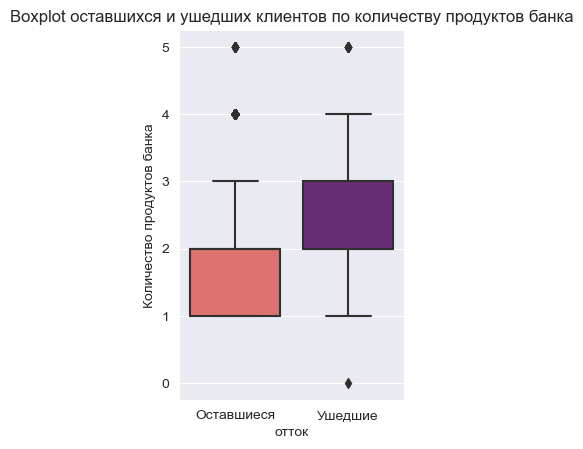

In [59]:
# boxplot оставшихся и ушедших клиентов по количеству продуктов банка  
sns.boxplot(y = 'products', x = 'churn', data = bank_data, ax = plt.subplot(1, 2, 2), palette='magma_r') 
plt.title('Boxplot оставшихся и ушедших клиентов по количеству продуктов банка')
plt.xlabel('отток')
plt.ylabel('Количество продуктов банка')
plt.xticks(np.arange(2), ('Оставшиеся', 'Ушедшие'))
plt.show();

In [60]:
#подсчет оставшихся и ушедших клиентов по количеству продуктов банка
bank_data_pr = bank_data.pivot_table(index='products', columns='churn', values ='user_id', aggfunc = 'nunique')
bank_data_pr.columns = ['stayed', 'left']
bank_data_pr

,stayed,left
products,,
0,NaN,1.0
1,3092.0,235.0
2,4146.0,979.0
3,742.0,297.0
4,174.0,300.0
5,11.0,8.0


In [61]:
#подсчет оставшихся и ушедших клиентов по среднему возрасту
bank_data_pr_age = bank_data.drop(0).pivot_table(index='products', columns='churn', values ='age', aggfunc = 'median').drop(0)
bank_data_pr_age.columns = ['stayed', 'left']
bank_data_pr_age

,stayed,left
products,,
1,40.0,39.0
2,41.0,38.0
3,43.0,42.0
4,37.0,39.0
5,35.0,38.5


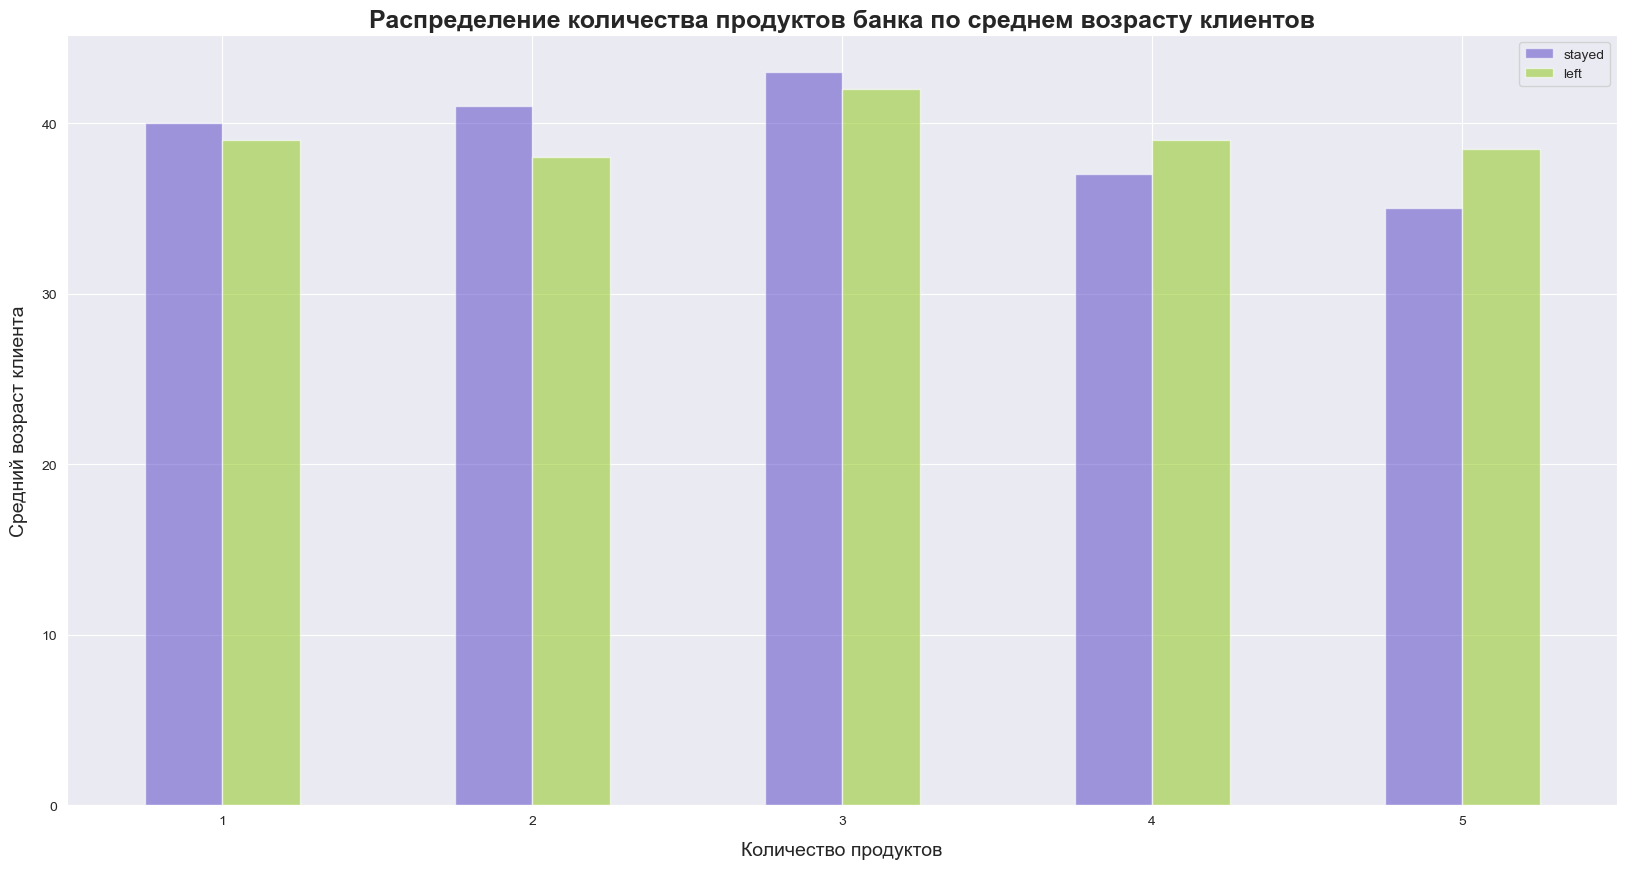

In [62]:
#график распределения продуктов банка у оставшихся и ушедших клиентов по возрасту
bank_data_prod = bank_data_pr.drop(0)
list = ['slateblue','yellowgreen']
fig, ax = plt.subplots()
(bank_data_pr_age.plot(kind='bar', figsize=(20,10), color = list, alpha =.6, ax=ax));
plt.title('Распределение количества продуктов банка по среднем возрасту клиентов', fontsize=18, weight = 'bold')
plt.xlabel('Количество продуктов', labelpad=10, weight='normal', size=14)
plt.ylabel('Средний возраст клиента', labelpad=10, weight='normal', size=14)
plt.xticks(rotation = 360)
plt.show()

**Вывод оттока по продуктам:** 
- 100% оттока среди клиентов нет. 
-  28% оттока среди клиентов с тремя продуктами в возрасте 45 лет с высоким балансом на счету и зарплатой.
- 19% оттока среди клиентов с двумя продуктами в возрасте 43 года с более низким балансом на счет, чем предыдущая категория. Зарплата их чуть выше и в этой категории половина клиентов имеет кредитную карту и были активны в последнее время.
- О продуктов имел только один ушедший клиент (79 лет, с высоким кредитным скорингом, с оценкой собственности в 3 балла, без кредитной карточки и низкой зарплатой), что можно посчитать аномалией.


**Общий вывод по сегменту клиентов, склонные к уходу из банка:**

Таким образом, можно выделить следующие признаки клиентов, которые стратегическим образом влияют на их отток:
- Среди ушедших самый высоки кредитный скоринг порядка 889 и 896 из 1000
- Средний возраст ушедших клиентов от 34 до 37 лет, но больше всего клиентов в возрасте 34 года
- Чаще всего это клиенты мужского пола 
- Ярославль имеет самое большое количество ушедших (1121) клиентов
- У ушедших клиентов собственность оценивалась в 5 баллов из 9
- В последнее время большинство ушедших клиентов проявляли активность
- Среди ушедших чуть больше половины клиентов имели кредитную карту, а другая часть нет
- Баланс на счету был ниже чем у оставшихся клиентов
- Ушедшие клиенты пользовались в основном 2 продуктами банка
- Корреляция показала, что основным признаком оттока по матрице корреляции клиентов это его баланс на счете, оценка их собственности и количество продуктов банка, которыми они пользуются. Однако, анализ этих причин были выявлены следующие особенности:
  - Баланс на счету является основной причиной. Чаще всего уходили клиенты с высоким балансом на счету и среднего возраста от 34 до 37 лет или чуть посатрше 58 лет, которые пользовались 2 продуктами банка с кредитной карточкой и с высоким кредитным скорингом;
  - Оценка собственности и количество используемых продуктов банка не являлись критичной причиной оттока клиентов.

## Проверка гипотез

### Различия дохода между теми клиентами, которые ушли и теми, которые остались;

**Нулевая гипотеза:** Доход ушедшего клиента от оставшего клиента не отличаются

**Альтернативная гипотеза:** Доход ушедшего клиента от оставшего клиента отличаются


In [63]:
alpha = 0.05

results = st.mannwhitneyu(bank_data[bank_data['churn']==1]['balance'], bank_data[bank_data['churn']==0]['balance'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  nan
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:** Доход ушедшего клиента значительно отличается от оставшего клиента

### Различия кредитного скоринга на то какие клиенты остаются и какие уходят;

**Нулевая гипотеза:**  Кредитный скоринг ушедшего клиента от оставшего клиента не отличаются

**Альтернативная гипотеза:** Кредитный скоринг ушедшего клиента от оставшего клиента отличаются


In [64]:
alpha = 0.05

results = st.mannwhitneyu(bank_data[bank_data['churn']==1]['score'], bank_data[bank_data['churn']==0]['score'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  5.414915248731254e-22
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:** Кредитный скоринг ушедшего клиента значительно отличается от оставшего клиента

### Различия количества продуктов, которыми пользуются клиенты, которые ушли и теми, которые остались;

**Нулевая гипотеза:** Количество продуктов банка используемыми ушедшим клиентом от оставшимся клиентом не отличаются

**Альтернативная гипотеза:** Количество продуктов банка используемыми ушедшим клиентом от оставшимся клиентом отличаются


In [65]:
alpha = 0.05

results = st.mannwhitneyu(bank_data[bank_data['churn']==1]['products'], bank_data[bank_data['churn']==0]['products'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  6.741137692868694e-162
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:** Количество продуктов банка используемыми ушедшим клиентом отличается от оставшегося клиента

### Различия в оценке собственности, которые ушли и теми, которые остались.

**Нулевая гипотеза:** Оценка собственности ушедшего клиента от оставшего клиента не отличаются

**Альтернативная гипотеза:** Оценка собственности ушедшего клиента от оставшего клиента отличаются


In [66]:
alpha = 0.05

results = st.mannwhitneyu(bank_data[bank_data['churn']==1]['equity'], bank_data[bank_data['churn']==0]['equity'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  2.2272704044623725e-158
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:** Оценка собственности ушедшего клиента отличается от оставшегося клиента

## Общие выводы и рекомендации маркетинговому отделу банка

**Общие выводы:**
- Основной отток клиентов мужского пола среднего возраста, с высоким балансом на счету, с зарплатой выше среднего, с оценкой собственности 4 балла, которые использовали 2 продукта банка и имели кредитную карту;
- Основной причиной ухода в чаще всего были баланс на счете и оценка их собственности, количество продуктов, которые им предоставил банк

**Рекомендации маркетинговому отделу банка:**
- Стоит предусмотреть скидки или уменьшение, например, ставок или налогов для тех клиентов, которые имеют высокий баланс на счету и высокую зарплату, а также использующие больше двух продуктов банка;
- Также расширить возраст клиентов предоставив различные выгодные предложения для каждой возрастной категории, например, ввести льготы или акции на продукты и услуги;
- Стоит обратить внимание на нулевой баланс на счету нескольких клиентов. В данном случае есть вероятность того, что клиент пользуется другим банком. Рекомендуется провести анализ конкурентов для получения данных для удержания клиентов;
- Более того, поскольку было выявлено большое количество клиентов с отсутствующими значениями по балансу на счету, необходимо провести по ним более детальный анализ. Возможно произошел технический сбой.

## Дополнительные материалы анализа оттока клиентов банка 

Презентация анализа оттока клиентов банка - https://disk.yandex.ru/d/9nkVMnIKaLVGBg

Дашборд оттока клиентов банка - https://public.tableau.com/views/_16778809635440/sheet1?:language=en-US&:display_count=n&:origin=viz_share_link